 2) Perform emotion mining

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [16]:
reviews=pd.read_csv('resultswebscrap.csv')
reviews

,Unnamed: 0,Rating,Review
0,0,1.0 out of 5 stars,1. No call recording feature2. Can't zoom on n...
1,1,1.0 out of 5 stars,"This is not a ranting review, it's friendly ad..."
2,2,2.0 out of 5 stars,1) Got this device delivered yesterday and it ...
3,3,3.0 out of 5 stars,Review (12GB):This phone has very good perfor...
4,4,5.0 out of 5 stars,This is my first OnePlus mobile so I can't com...
5,5,5.0 out of 5 stars,Got my new phone today . Upgraded fron One plu...
6,6,3.0 out of 5 stars,Product is good except camera. Oxygen Os is no...
7,7,4.0 out of 5 stars,VERDICTDisplay - 9/10Performance - 10/10Batter...
8,8,5.0 out of 5 stars,This photo is clicked in nightscape mode... aw...
9,9,1.0 out of 5 stars,Worst MobileShame on OnePlusWorst display qual...


,Rating,Review
0,1.0 out of 5 stars,1. No call recording feature2. Can't zoom on n...
1,1.0 out of 5 stars,"This is not a ranting review, it's friendly ad..."
2,2.0 out of 5 stars,1) Got this device delivered yesterday and it ...
3,3.0 out of 5 stars,Review (12GB):This phone has very good perfor...
4,5.0 out of 5 stars,This is my first OnePlus mobile so I can't com...
5,5.0 out of 5 stars,Got my new phone today . Upgraded fron One plu...
6,3.0 out of 5 stars,Product is good except camera. Oxygen Os is no...
7,4.0 out of 5 stars,VERDICTDisplay - 9/10Performance - 10/10Batter...
8,5.0 out of 5 stars,This photo is clicked in nightscape mode... aw...
9,1.0 out of 5 stars,Worst MobileShame on OnePlusWorst display qual...


In [18]:
reviews.rename(columns ={'Rating':'stars', 'Review':'comment'}, inplace = True)
reviews

,Unnamed: 0,stars,comment
0,0,1.0 out of 5 stars,1. No call recording feature2. Can't zoom on n...
1,1,1.0 out of 5 stars,"This is not a ranting review, it's friendly ad..."
2,2,2.0 out of 5 stars,1) Got this device delivered yesterday and it ...
3,3,3.0 out of 5 stars,Review (12GB):This phone has very good perfor...
4,4,5.0 out of 5 stars,This is my first OnePlus mobile so I can't com...
5,5,5.0 out of 5 stars,Got my new phone today . Upgraded fron One plu...
6,6,3.0 out of 5 stars,Product is good except camera. Oxygen Os is no...
7,7,4.0 out of 5 stars,VERDICTDisplay - 9/10Performance - 10/10Batter...
8,8,5.0 out of 5 stars,This photo is clicked in nightscape mode... aw...
9,9,1.0 out of 5 stars,Worst MobileShame on OnePlusWorst display qual...


In [19]:
reviews.drop(reviews.columns[0],axis=1)

,stars,comment
0,1.0 out of 5 stars,1. No call recording feature2. Can't zoom on n...
1,1.0 out of 5 stars,"This is not a ranting review, it's friendly ad..."
2,2.0 out of 5 stars,1) Got this device delivered yesterday and it ...
3,3.0 out of 5 stars,Review (12GB):This phone has very good perfor...
4,5.0 out of 5 stars,This is my first OnePlus mobile so I can't com...
5,5.0 out of 5 stars,Got my new phone today . Upgraded fron One plu...
6,3.0 out of 5 stars,Product is good except camera. Oxygen Os is no...
7,4.0 out of 5 stars,VERDICTDisplay - 9/10Performance - 10/10Batter...
8,5.0 out of 5 stars,This photo is clicked in nightscape mode... aw...
9,1.0 out of 5 stars,Worst MobileShame on OnePlusWorst display qual...


In [20]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

["1. No call recording feature2. Can't zoom on nightmode3. No Pro mode for video4. No 120 fps option for slow motion5. Charging takes more than 1hr. No fast charging.6. Camera output is full of shadow (dark regions)7. No optimization on camera8. No HDR mode9. Macro camera has no details. Low quality photo10. In Pro mode you can't shoot through wide angle camera.11. No option to hide contacts without phone number.I can list 100s of missing options. But don't have patience.This is not the phone you will buy. They don't have basic functionalities. Better buy Mi or",
 "This is not a ranting review, it's friendly advice that would save you some money and time.I was using Oneplus 6 before upgrading to Oneplus 8T. Of course, wanted to experience that improved performance and high-quality display with a 120Hz refresh rate that everyone is talking about.But, the problem with Oneplus 8T is the display itself. First of all, if you are getting Oneplus 8T, you gonna have screen issues straight out 

In [21]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"1. No call recording feature2. Can't zoom on nightmode3. No Pro mode for video4. No 120 fps option for slow motion5. Charging takes more than 1hr. No fast charging.6. Camera output is full of shadow (dark regions)7. No optimization on camera8. No HDR mode9. Macro camera has no details. Low quality photo10. In Pro mode you can't shoot through wide angle camera.11. No option to hide contacts without phone number.I can list 100s of missing options. But don't have patience.This is not the phone you will buy. They don't have basic functionalities. Better buy Mi or This is not a ranting review, it's friendly advice that would save you some money and time.I was using Oneplus 6 before upgrading to Oneplus 8T. Of course, wanted to experience that improved performance and high-quality display with a 120Hz refresh rate that everyone is talking about.But, the problem with Oneplus 8T is the display itself. First of all, if you are getting Oneplus 8T, you gonna have screen issues straight out of th

In [22]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'1 No call recording feature2 Cant zoom on nightmode3 No Pro mode for video4 No 120 fps option for slow motion5 Charging takes more than 1hr No fast charging6 Camera output is full of shadow dark regions7 No optimization on camera8 No HDR mode9 Macro camera has no details Low quality photo10 In Pro mode you cant shoot through wide angle camera11 No option to hide contacts without phone numberI can list 100s of missing options But dont have patienceThis is not the phone you will buy They dont have basic functionalities Better buy Mi or This is not a ranting review its friendly advice that would save you some money and timeI was using Oneplus 6 before upgrading to Oneplus 8T Of course wanted to experience that improved performance and highquality display with a 120Hz refresh rate that everyone is talking aboutBut the problem with Oneplus 8T is the display itself First of all if you are getting Oneplus 8T you gonna have screen issues straight out of the boxReference keywords for your Goog

In [23]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['1', 'No', 'call', 'recording', 'feature2', 'Cant', 'zoom', 'on', 'nightmode3', 'No', 'Pro', 'mode', 'for', 'video4', 'No', '120', 'fps', 'option', 'for', 'slow', 'motion5', 'Charging', 'takes', 'more', 'than', '1hr', 'No', 'fast', 'charging6', 'Camera', 'output', 'is', 'full', 'of', 'shadow', 'dark', 'regions7', 'No', 'optimization', 'on', 'camera8', 'No', 'HDR', 'mode9', 'Macro', 'camera', 'has', 'no', 'details', 'Low']


In [25]:
len(text_tokens)

1942

In [26]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['1', 'No', 'call', 'recording', 'feature2', 'Cant', 'zoom', 'nightmode3', 'No', 'Pro', 'mode', 'video4', 'No', '120', 'fps', 'option', 'slow', 'motion5', 'Charging', 'takes', '1hr', 'No', 'fast', 'charging6', 'Camera', 'output', 'full', 'shadow', 'dark', 'regions7', 'No', 'optimization', 'camera8', 'No', 'HDR', 'mode9', 'Macro', 'camera', 'details', 'Low', 'quality', 'photo10', 'In', 'Pro', 'mode', 'cant', 'shoot', 'wide', 'angle', 'camera11', 'No', 'option', 'hide', 'contacts', 'without', 'phone', 'numberI', 'list', '100s', 'missing', 'options', 'But', 'dont', 'patienceThis', 'phone', 'buy', 'They', 'dont', 'basic', 'functionalities', 'Better', 'buy', 'Mi', 'This', 'ranting', 'review', 'friendly', 'advice', 'would', 'save', 'money', 'timeI', 'using', 'Oneplus', '6', 'upgrading', 'Oneplus', '8T', 'Of', 'course', 'wanted', 'experience', 'improved', 'performance', 'highquality', 'display', '120Hz', 'refresh', 'rate', 'everyone', 'talking', 'aboutBut', 'problem', 'Oneplus', '8T', 'displa

In [27]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['1', 'no', 'call', 'recording', 'feature2', 'cant', 'zoom', 'nightmode3', 'no', 'pro', 'mode', 'video4', 'no', '120', 'fps', 'option', 'slow', 'motion5', 'charging', 'takes', '1hr', 'no', 'fast', 'charging6', 'camera', 'output', 'full', 'shadow', 'dark', 'regions7', 'no', 'optimization', 'camera8', 'no', 'hdr', 'mode9', 'macro', 'camera', 'details', 'low', 'quality', 'photo10', 'in', 'pro', 'mode', 'cant', 'shoot', 'wide', 'angle', 'camera11', 'no', 'option', 'hide', 'contacts', 'without', 'phone', 'numberi', 'list', '100s', 'missing', 'options', 'but', 'dont', 'patiencethis', 'phone', 'buy', 'they', 'dont', 'basic', 'functionalities', 'better', 'buy', 'mi', 'this', 'ranting', 'review', 'friendly', 'advice', 'would', 'save', 'money', 'timei', 'using', 'oneplus', '6', 'upgrading', 'oneplus', '8t', 'of', 'course', 'wanted', 'experience', 'improved', 'performance', 'highquality', 'display', '120hz', 'refresh', 'rate', 'everyone', 'talking', 'aboutbut', 'problem', 'oneplus', '8t', 'displa

In [28]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['1', 'no', 'call', 'record', 'feature2', 'cant', 'zoom', 'nightmode3', 'no', 'pro', 'mode', 'video4', 'no', '120', 'fp', 'option', 'slow', 'motion5', 'charg', 'take', '1hr', 'no', 'fast', 'charging6', 'camera', 'output', 'full', 'shadow', 'dark', 'regions7', 'no', 'optim', 'camera8', 'no', 'hdr', 'mode9', 'macro', 'camera', 'detail', 'low', 'qualiti', 'photo10', 'in', 'pro', 'mode', 'cant', 'shoot', 'wide', 'angl', 'camera11', 'no', 'option', 'hide', 'contact', 'without', 'phone', 'numberi', 'list', '100', 'miss', 'option', 'but', 'dont', 'patiencethi', 'phone', 'buy', 'they', 'dont', 'basic', 'function', 'better', 'buy', 'mi', 'thi', 'rant', 'review', 'friendli', 'advic', 'would', 'save', 'money', 'timei', 'use', 'oneplu', '6', 'upgrad', 'oneplu', '8t', 'of', 'cours', 'want', 'experi', 'improv', 'perform', 'highqual', 'display', '120hz', 'refresh', 'rate', 'everyon', 'talk', 'aboutbut', 'problem', 'oneplu', '8t', 'display', 'first', 'get', 'oneplu', '8t', 'gon', 'na', 'screen', 'issu

In [29]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

1 no call recording feature2 cant zoom nightmode3 no pro mode video4 no 120 fps option slow motion5 charging takes 1hr no fast charging6 camera output full shadow dark regions7 no optimization camera8 no hdr mode9 macro camera details low quality photo10 in pro mode cant shoot wide angle camera11 no option hide contacts without phone numberi list 100s missing options but dont patiencethis phone buy they dont basic functionalities better buy mi this ranting review friendly advice would save money timei using oneplus 6 upgrading oneplus 8t of course wanted experience improved performance highquality display 120hz refresh rate everyone talking aboutbut problem oneplus 8t display first getting oneplus 8t gon na screen issues straight boxreference keywords google research oneplus purple tint oneplus black crush oneplus ghostingmine purple tintremember old phones used use 8 years back poorly made screens looked sharp front tilt certain extent colours get washedsame happening keep phone brigh

In [30]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['1', 'no', 'call', 'record', 'feature2', 'can', 'not', 'zoom', 'nightmode3', 'no', 'pro', 'mode', 'video4', 'no', '120', 'fps', 'option', 'slow', 'motion5', 'charging', 'take', '1hr', 'no', 'fast', 'charging6', 'camera', 'output', 'full', 'shadow', 'dark', 'regions7', 'no', 'optimization', 'camera8', 'no', 'hdr', 'mode9', 'macro', 'camera', 'detail', 'low', 'quality', 'photo10', 'in', 'pro', 'mode', 'can', 'not', 'shoot', 'wide', 'angle', 'camera11', 'no', 'option', 'hide', 'contact', 'without', 'phone', 'numberi', 'list', '100s', 'miss', 'option', 'but', 'do', 'not', 'patiencethis', 'phone', 'buy', 'they', 'do', 'not', 'basic', 'functionality', 'well', 'buy', 'mi', 'this', 'rant', 'review', 'friendly', 'advice', 'would', 'save', 'money', 'timei', 'use', 'oneplus', '6', 'upgrading', 'oneplus', '8', 't', 'of', 'course', 'want', 'experience', 'improve', 'performance', 'highquality', 'display', '120hz', 'refresh', 'rate', 'everyone', 'talk', 'aboutbut', 'problem', 'oneplus', '8', 't', 'd

In [31]:
clean_reviews=' '.join(lemmas)
clean_reviews

'1 no call record feature2 can not zoom nightmode3 no pro mode video4 no 120 fps option slow motion5 charging take 1hr no fast charging6 camera output full shadow dark regions7 no optimization camera8 no hdr mode9 macro camera detail low quality photo10 in pro mode can not shoot wide angle camera11 no option hide contact without phone numberi list 100s miss option but do not patiencethis phone buy they do not basic functionality well buy mi this rant review friendly advice would save money timei use oneplus 6 upgrading oneplus 8 t of course want experience improve performance highquality display 120hz refresh rate everyone talk aboutbut problem oneplus 8 t display first get oneplus 8 t go to screen issue straight boxreference keyword google research oneplus purple tint oneplus black crush oneplus ghostingmine purple tintremember old phone use use 8 year back poorly make screen look sharp front tilt certain extent colour get washedsame happen keep phone brightness 30secondly screen brig

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [33]:
print(cv.vocabulary_)

{'no': 364, 'call': 109, 'record': 466, 'feature2': 208, 'can': 114, 'not': 368, 'zoom': 630, 'nightmode3': 362, 'pro': 431, 'mode': 347, 'video4': 603, '120': 14, 'fps': 226, 'option': 392, 'slow': 511, 'motion5': 352, 'charging': 123, 'take': 542, '1hr': 21, 'fast': 206, 'charging6': 124, 'camera': 111, 'output': 398, 'full': 230, 'shadow': 499, 'dark': 158, 'regions7': 471, 'optimization': 390, 'camera8': 113, 'hdr': 263, 'mode9': 348, 'macro': 327, 'detail': 167, 'low': 325, 'quality': 450, 'photo10': 411, 'in': 284, 'shoot': 502, 'wide': 616, 'angle': 67, 'camera11': 112, 'hide': 268, 'contact': 144, 'without': 623, 'phone': 409, 'numberi': 376, 'list': 318, '100s': 3, 'miss': 342, 'but': 105, 'do': 176, 'patiencethis': 403, 'buy': 106, 'they': 552, 'basic': 90, 'functionality': 233, 'well': 613, 'mi': 336, 'this': 554, 'rant': 457, 'review': 479, 'friendly': 227, 'advice': 52, 'would': 625, 'save': 484, 'money': 349, 'timei': 560, 'use': 592, 'oneplus': 386, 'upgrading': 587, 'of

In [34]:
print(cv.get_feature_names()[150:300])

['costconsfront', 'could', 'course', 'cover', 'crack', 'crush', 'curve', 'damage', 'dark', 'datum', 'day', 'decent', 'decrease', 'deeply', 'default', 'defeciencie', 'deliver', 'detail', 'device', 'devicespecific', 'difference2', 'digital', 'disappoint', 'disappointment', 'display', 'distance', 'do', 'dolby', 'drain', 'drop', 'due', 'durability', 'easilycase', 'effect', 'else', 'enable', 'end', 'environment', 'error', 'especially', 'etc', 'even', 'everyday', 'everyone', 'example', 'excellent', 'except', 'expect', 'experience', 'experiencefast', 'extent', 'extra', 'extremely', 'face', 'facebook', 'fail', 'fast', 'feature', 'feature2', 'feedback', 'feel', 'feeling', 'filter', 'find', 'fine', 'finger', 'fingerprint', 'first', 'fix', 'flagship', 'flagshipabout', 'flat', 'fluid', 'follows1', 'for', 'force', 'fps', 'friendly', 'fron', 'front', 'full', 'fully', 'function', 'functionality', 'future', 'galaxy', 'gallery', 'gamer', 'gaming', 'gamingmisc', 'gb', 'gesture', 'get', 'ghostingmine', '

C:\Users\rashm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(reviewscv.toarray().shape)

(1215, 631)


In [37]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [38]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['11', '20', 'after', 'android', 'app', 'around', 'bad', 'battery', 'bit', 'brightness', 'but', 'buy', 'call', 'camera', 'can', 'charge', 'charging', 'cloud', 'come', 'consider', 'day', 'device', 'display', 'do', 'even', 'experience', 'fast', 'feature', 'first', 'fix', 'for', 'front', 'future', 'gb', 'get', 'go', 'good', 'great', 'heat', 'heating', 'hope', 'hour', 'improvement', 'include', 'increase', 'issue', 'keep', 'know', 'like', 'look', 'make', 'mark', 'min', 'mobile', 'mode', 'need', 'nice', 'no', 'not', 'notice', 'old', 'one', 'oneplus', 'option', 'os', 'other', 'oxygen', 'phone', 'pic', 'picture', 'plus', 'point', 'price', 'quality', 'ram', 'rate', 'really', 'remove', 'review', 'say', 'screen', 'seem', 'share', 'similar', 'software', 'start', 'storage', 'take', 'telephoto', 'this', 'time', 'tint', 'update', 'use', 'useful', 'video', 'want', 'well', 'without', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [40]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '100s', '1010battery', '1010charging', '1010overall', '1010sound', '1015', '11', '1101', '11after', '11xx', '12', '120', '120hz', '128', '12gbthis', '155', '16', '16thi', '1hr', '1st', '20', '200', '2nd', '30', '30secondly', '3k', '40', '41', '45k', '46k', '50k', '5rest', '6070', '6tor', '70', '810software', '865', '8dure', '8t2', '8tother', '910camera', '910performance', '9510go', 'aboutbut', 'account', 'acko', 'act', 'addition', 'additional', 'advice', 'advisable', 'after', 'again2', 'airtel', 'allow', 'already', 'also', 'aluminium', 'always', 'amazing', 'amazon', 'amole', 'and', 'android', 'angle', 'annoying3', 'anyone', 'app', 'app4', 'apply', 'approx', 'aquamarine', 'around', 'artificial', 'atleast', 'atleastbetter', 'back', 'bad', 'base', 'battery', 'big', 'bit', 'black', 'box', 'brightness', 'but', 'buy', 'call', 'camera', 'can', 'capture', 'certain', 'charge', 'charging', 'charging6', 'click', 'cloud', 'club', 'colour', 'colourful', 'come', 'community', 'company',

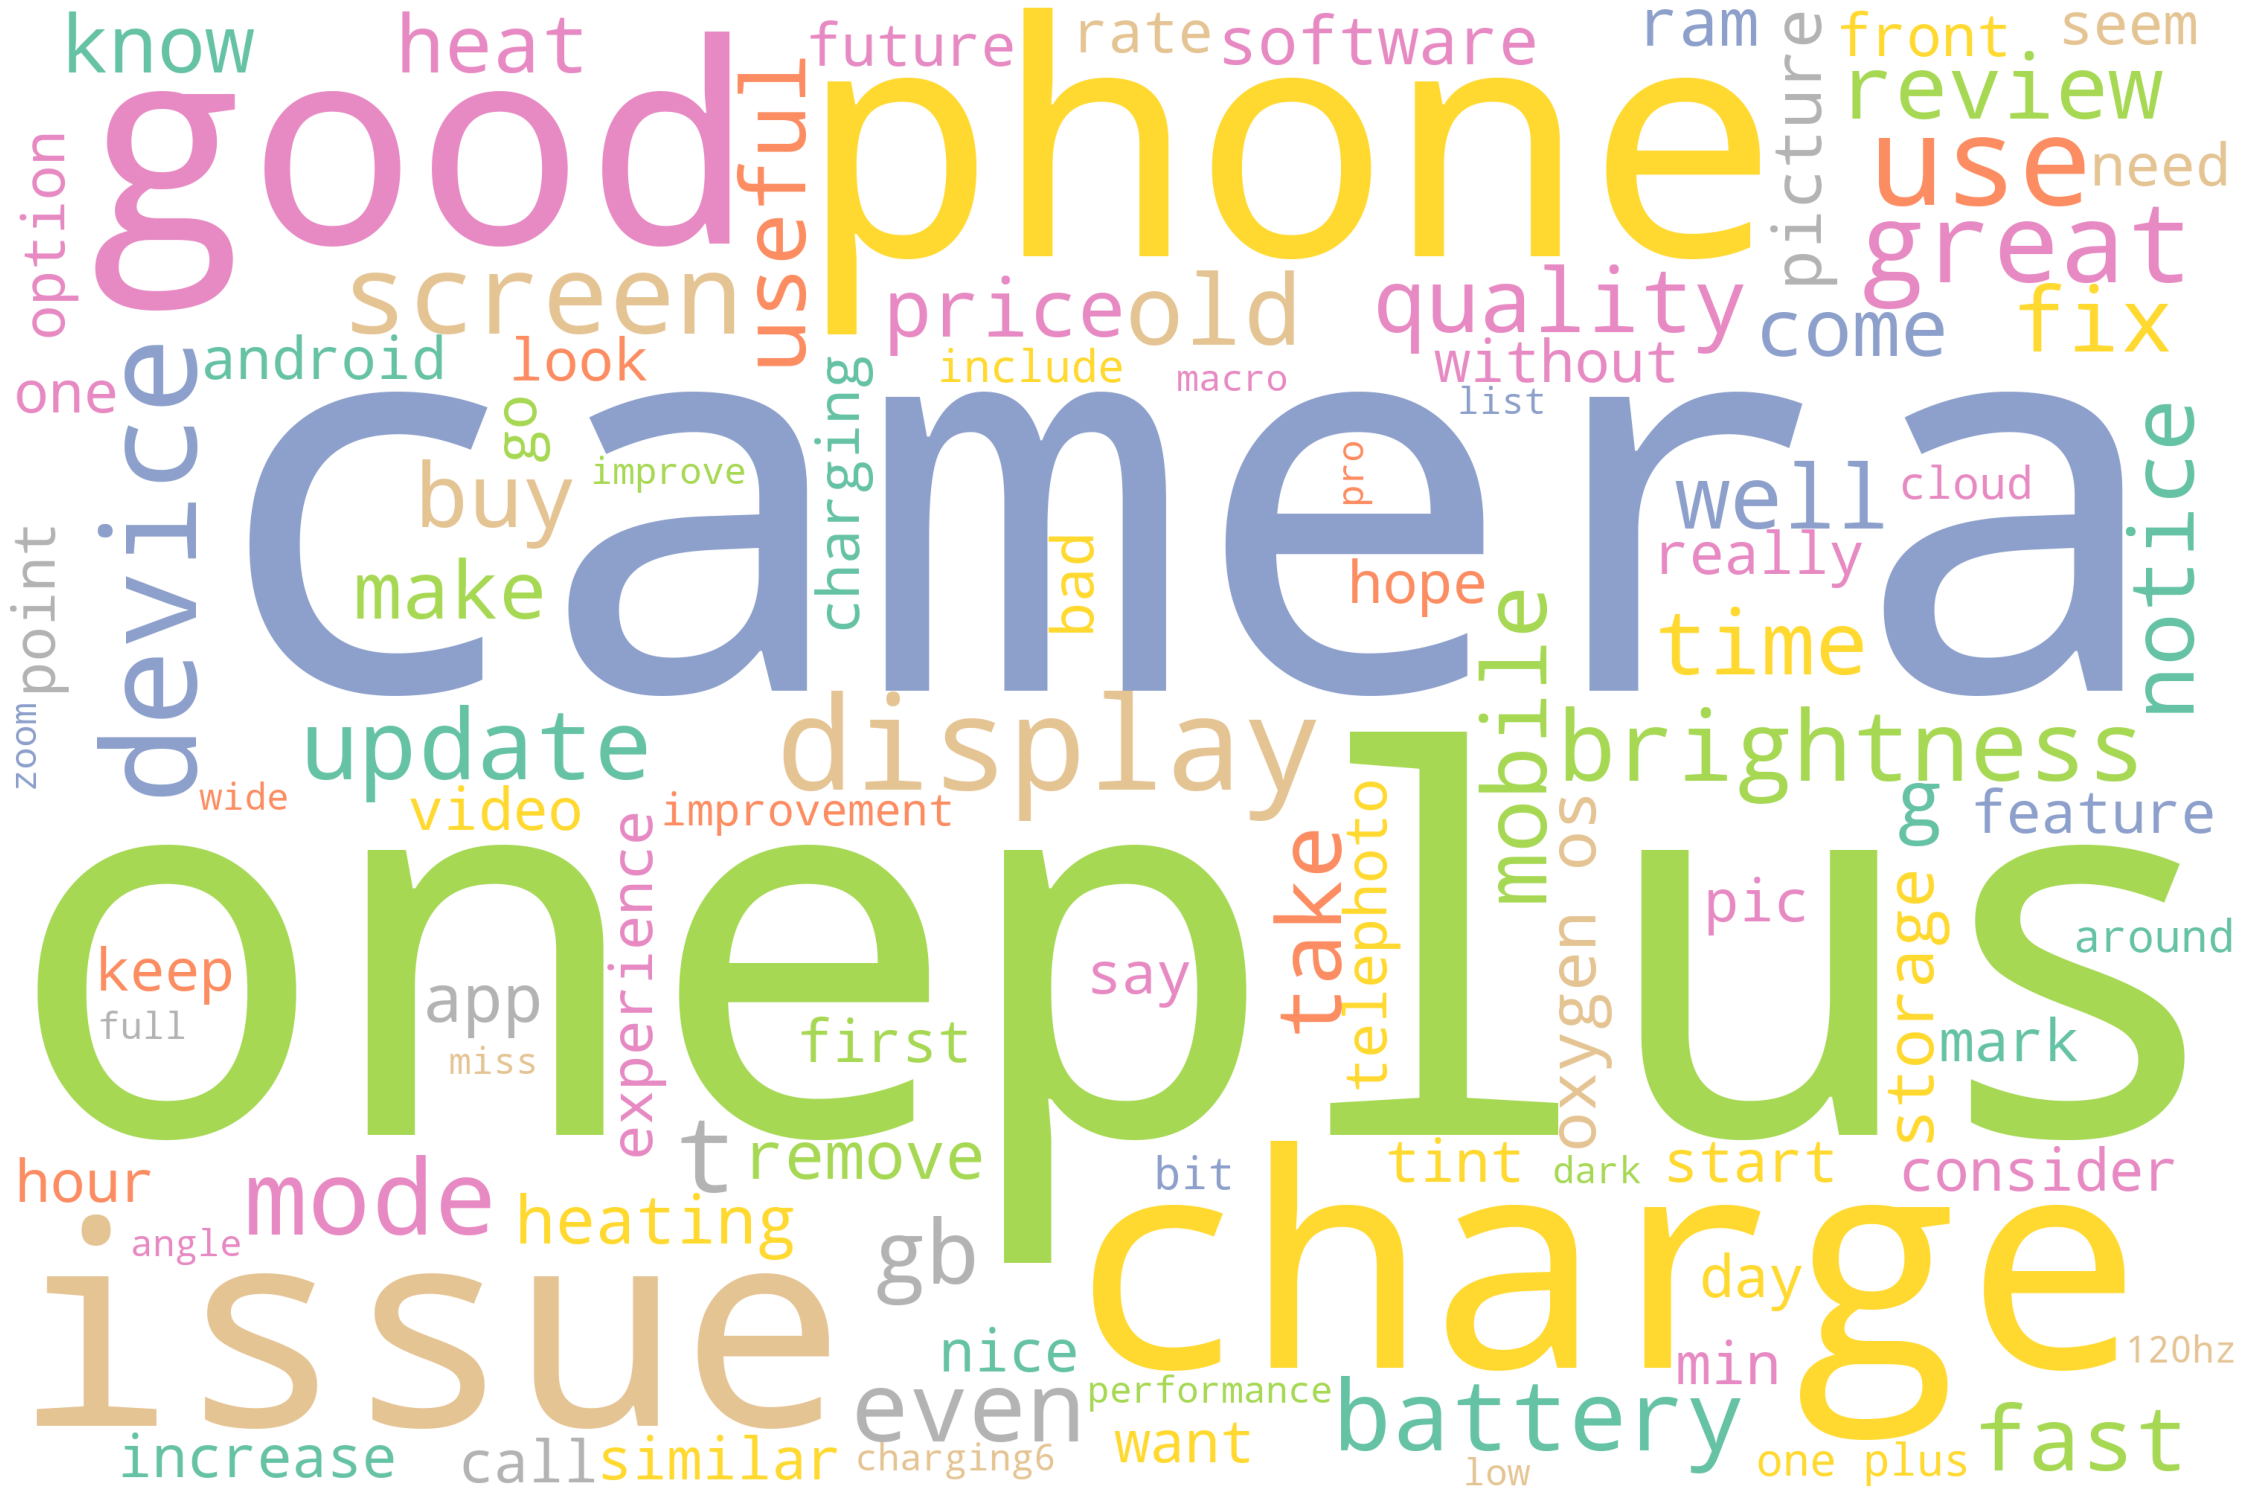

In [41]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [42]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [43]:
for token in doc_block[100:200]:
    print(token,token.pos_)

display NOUN
120hz NOUN
refresh NOUN
rate NOUN
everyone PRON
talk VERB
aboutbut ADP
problem NOUN
oneplus PROPN
8 NUM
t NOUN
display NOUN
first ADV
get VERB
oneplus NOUN
8 NUM
t NOUN
go VERB
to PART
screen NOUN
issue NOUN
straight ADJ
boxreference NOUN
keyword PROPN
google PROPN
research PROPN
oneplus NOUN
purple ADJ
tint NOUN
oneplus NOUN
black ADJ
crush NOUN
oneplus NOUN
ghostingmine VERB
purple ADJ
tintremember PROPN
old ADJ
phone NOUN
use NOUN
use NOUN
8 NUM
year NOUN
back ADV
poorly ADV
make VERB
screen NOUN
look VERB
sharp ADJ
front ADJ
tilt NOUN
certain ADJ
extent NOUN
colour NOUN
get VERB
washedsame ADJ
happen VERB
keep VERB
phone NOUN
brightness NOUN
30secondly NUM
screen NOUN
brightness NOUN
like ADP
old ADJ
tube NOUN
light NOUN
when SCONJ
increase NOUN
decrease NOUN
screen NOUN
brightness NOUN
use NOUN
toggle NOUN
notification NOUN
panel NOUN
take VERB
time NOUN
respond NOUN
changefor ADP
example NOUN
increase NOUN
brightness NOUN
30 NUM
70 NUM
take VERB
good ADJ
halfsecond A

In [44]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['use', 'toggle', 'notification', 'panel', 'take', 'time', 'respond', 'example', 'increase', 'brightness', 'take', 'respond', 'change', 'increase', 'brightness', 'device', 'device', 'phone', 'price', 'point', 'keep', 'competition', 'come', 'screen', 'recommend', 'read', 'review', 'buy', 'product', 'get', 'device', 'deliver', 'yesterday', 'start', 'heat', 'setup', 'stage', 'ignore', 'charge', 'thought', 'transfer', 'datum', 'device', 'contac', 'message', 'song', 'device', 'start', 'heat', 'again2', 'charger', 'make', 'sense', 'battery', 'drain', 'speed3', 'slot', 'use', 'datum', 'network', 'know', 'oneplus', 'mark', 'return', 'disappoint', 'review', 'phone', 'performance', 'order', 'silver', 'receive', 'want', 'spend', 'time', 'keep', 'performancespeed', 'processor', 'battery', 'life', 'price', 'consider', 'highend', 'feature', 'phone', 'provide', 'miss', 'wahh', 'feeling', 'consider', 'end', 'phone', 'gesture', 'control', 'finger', 'print', 'scanner', 'cover', 'provide', 'phone', 'help

In [45]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,camera,21
1,phone,18
2,get,17
3,oneplus,16
4,charge,15
5,issue,13
6,device,11
7,use,9
8,display,8
9,screen,8


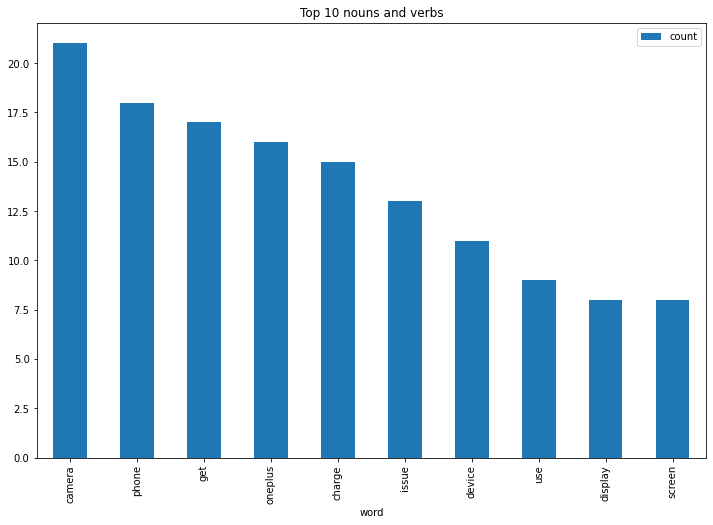

In [46]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [47]:
#emotion
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['1.',
 'No call recording feature2.',
 "Can't zoom on nightmode3.",
 'No Pro mode for video4.',
 'No 120 fps option for slow motion5.',
 'Charging takes more than 1hr.',
 'No fast charging.6.',
 'Camera output is full of shadow (dark regions)7.',
 'No optimization on camera8.',
 'No HDR mode9.',
 'Macro camera has no details.',
 'Low quality photo10.',
 "In Pro mode you can't shoot through wide angle camera.11.",
 'No option to hide contacts without phone number.I can list 100s of missing options.',
 "But don't have patience.This is not the phone you will buy.",
 "They don't have basic functionalities.",
 "Better buy Mi or This is not a ranting review, it's friendly advice that would save you some money and time.I was using Oneplus 6 before upgrading to Oneplus 8T.",
 'Of course, wanted to experience that improved performance and high-quality display with a 120Hz refresh rate that everyone is talking about.But, the problem with Oneplus 8T is the display itself.',
 'First of all, if yo

In [48]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,1.
1,No call recording feature2.
2,Can't zoom on nightmode3.
3,No Pro mode for video4.
4,No 120 fps option for slow motion5.
...,...
111,"Just that it is not the best, and I wish they ..."
112,You can take very good pictures with the 8T an...
113,The pictures produced by the 8T are not photog...
114,This photo is clicked in nightscape mode... aw...


In [50]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [52]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [53]:
# manual testing
calculate_sentiment(text='good service')

3

In [54]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1     -1
2      0
3     -1
4     -1
      ..
111    4
112    7
113    7
114    4
115    4
Name: sentiment_value, Length: 116, dtype: int64

In [55]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       1
1       4
2       4
3       5
4       7
       ..
111    16
112    13
113    27
114    20
115    62
Name: word_count, Length: 116, dtype: int64

In [56]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
36,But camera lacks features considering 46k pric...,-4,10
30,(Update: I received an oxygen OS 11.x.x update...,-4,40
13,No option to hide contacts without phone numbe...,-4,14
33,But 16 MP front cam does a bad job when took p...,-3,18
97,"With 12GB RAM, I don't have to worry about it.",-3,10
...,...,...,...
27,"I dont' want to spend more time on this, so ke...",7,73
112,You can take very good pictures with the 8T an...,7,13
113,The pictures produced by the 8T are not photog...,7,27
19,When you increase or decrease your screen brig...,7,46


In [57]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    116.000000
mean       0.862069
std        2.366052
min       -4.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        8.000000
Name: sentiment_value, dtype: float64

In [58]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,1.,0,1
1,No call recording feature2.,-1,4
2,Can't zoom on nightmode3.,0,4
3,No Pro mode for video4.,-1,5
4,No 120 fps option for slow motion5.,-1,7
...,...,...,...
100,I don't have any heating issues.,0,6
103,I must say I haven't played too much except fo...,0,12
107,Call quality and network reception/ connectivi...,0,9
109,Even the Samsung Galaxy S20FE has better camer...,0,13


In [59]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
16,"Better buy Mi or This is not a ranting review,...",1,30
17,"Of course, wanted to experience that improved ...",1,30
18,"First of all, if you are getting Oneplus 8T, y...",6,90
19,When you increase or decrease your screen brig...,7,46
20,Increasing brightness on this device is not in...,2,48
23,"After charging, thought of transferring my dat...",4,76
25,Review (12GB):This phone has very good perfor...,3,7
27,"I dont' want to spend more time on this, so ke...",7,73
29,"After 100% charge, it automatically get cooled.",1,7
31,But noticed while charging=> No charging issue...,2,15


In [60]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,1.,0,1,0
1,No call recording feature2.,-1,4,1
2,Can't zoom on nightmode3.,0,4,2
3,No Pro mode for video4.,-1,5,3
4,No 120 fps option for slow motion5.,-1,7,4
...,...,...,...,...
111,"Just that it is not the best, and I wish they ...",4,16,111
112,You can take very good pictures with the 8T an...,7,13,112
113,The pictures produced by the 8T are not photog...,7,27,113
114,This photo is clicked in nightscape mode... aw...,4,20,114


C:\Users\rashm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

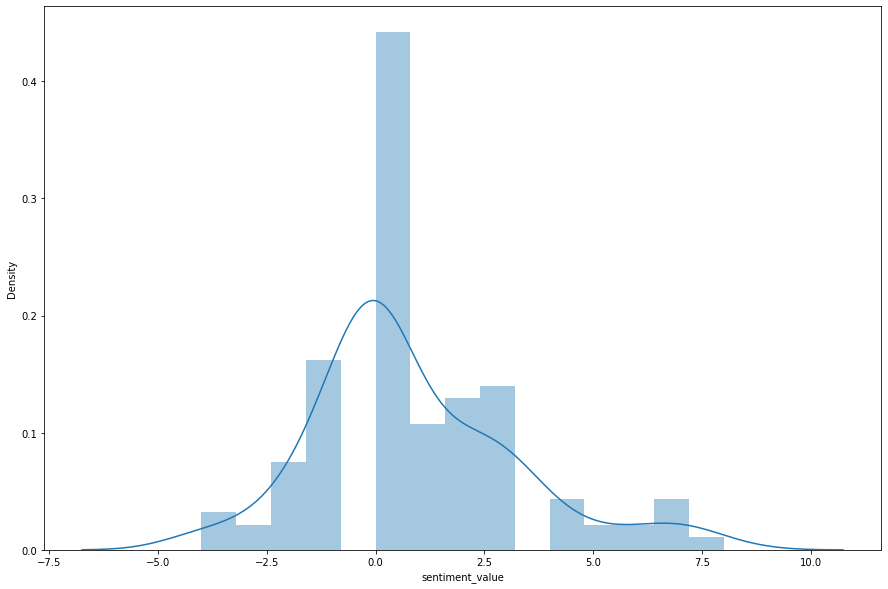

In [61]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

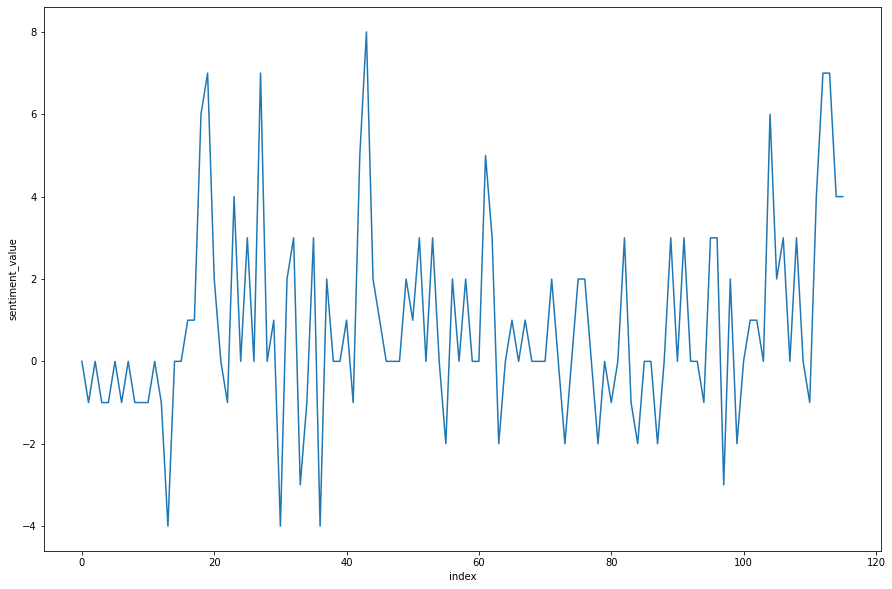

In [62]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)